387
874
865
850
542


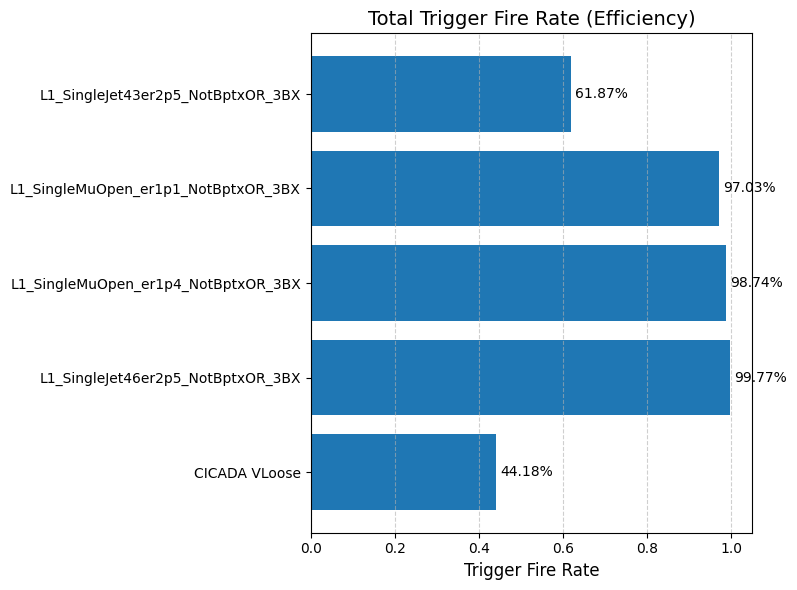

In [4]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# Open the ROOT file
filename = "CICADA_HIG-RunIISummer20UL17HLT_2025v11-13144.root"
tree = uproot.open(filename)["Events"]

# Total number of events
n_events = tree.num_entries

# Define trigger branches to evaluate
trigger_branches = {
    "CICADA VLoose": "DST_PFScouting_CICADAVLoose",
    "L1_SingleJet46er2p5_NotBptxOR_3BX": "L1_SingleJet46er2p5_NotBptxOR_3BX",
    "L1_SingleMuOpen_er1p4_NotBptxOR_3BX": "L1_SingleMuOpen_er1p4_NotBptxOR_3BX",
    "L1_SingleMuOpen_er1p1_NotBptxOR_3BX": "L1_SingleMuOpen_er1p1_NotBptxOR_3BX",
    "L1_SingleJet43er2p5_NotBptxOR_3BX": "L1_SingleJet43er2p5_NotBptxOR_3BX"
}

# Store results
fire_rates = {}

# Loop through and compute fire rate
for label, branch in trigger_branches.items():
    decision = tree[branch].array(library="np")
    fired = np.count_nonzero(decision)
    print(fired)
    efficiency = fired / n_events
    fire_rates[label] = efficiency

# Plotting
labels = list(fire_rates.keys())
values = [fire_rates[k] for k in labels]

plt.figure(figsize=(8, 6))
bars = plt.barh(labels, values)
plt.xlabel("Trigger Fire Rate", fontsize=12)
plt.title("Total Trigger Fire Rate (Efficiency)", fontsize=14)
plt.xlim(0, 1.05)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2%}", va='center', fontsize=10)
plt.tight_layout()
plt.savefig("trigger_fire_rate_comparison.png")
plt.show()
